<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/1/MLP_Basics_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

from matplotlib import rcParams
# rcParams['figure.figsize'] = 15,7
plt.rc('figure', figsize=(12,7) )         # Image size

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 3 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 10 )

plt.rc('figure', figsize=(10,5) )         # Image size

In [3]:
def grid(x1, x2, off_set = .1, n_points = 100):
    ## d s show the range in the two varible. 
    d1 = x1.max() - x1.min()
    d2 = x2.max() - x2.min()
    
    x1_min, x1_max = x1.min() - off_set * d1 , x1.max() + off_set * d1
    x2_min, x2_max = x2.min() - off_set * d2 , x2.max() + off_set * d2

    ## This function from numpy gives a list of coordinates that are the points on the grid. 
    x, y = np.meshgrid(np.arange(x1_min, x1_max , d1/n_points), np.arange(x2_min, x2_max , d2/n_points) )

    return x , y 

In [4]:
import io, requests

#####BBR###### 
## This data is collected from galileo.phys.virginia.edu/classes/252
url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Data/bbr.xls?raw=true"
data_bbr = pd.read_excel(url)

########Particles#######
# Data taken from https://www.kaggle.com/naharrison/particle-identification-from-detector-responses

url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data_prtcl=pd.read_csv(io.BytesIO(s) , compression='zip' )
data_prtcl = data_prtcl.sample(10000)
data_prtcl.id = data_prtcl.id.astype('category').cat.codes 


# data_prtcl.head()

########GS energy#######
'''
We need to first import the data. I took the data from the following kaggle dataset. 

https://www.kaggle.com/burakhmmtgl/energy-molecule

These are the ground state energies of some molecules based on their different 
chemical bounds. 
'''
url = 'https://www.dropbox.com/s/das9t6vwp7t4b7f/roboBohr.csv.zip?dl=1'
s=requests.get(url, stream=True).content
data_gse=pd.read_csv(io.BytesIO(s) , compression='zip' , index_col=0)


Here are the label populations:
 Counter({3: 3856, 2: 456}).


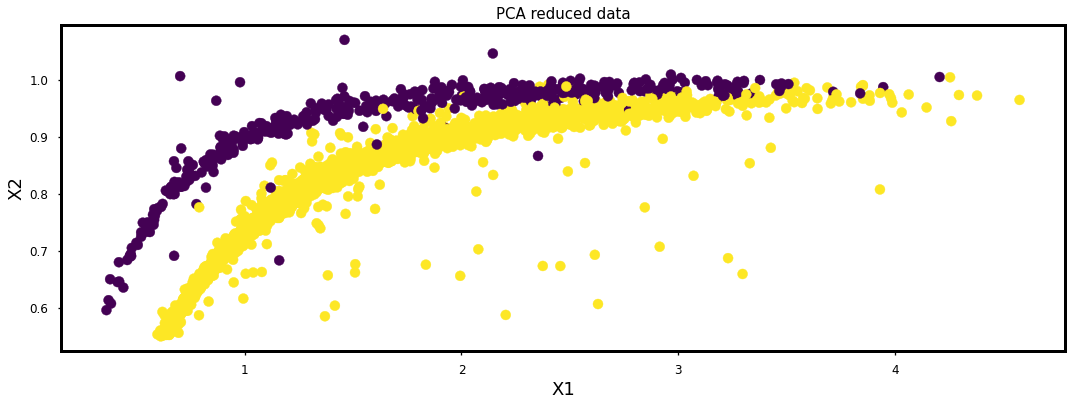

In [5]:
'''
Here we want to turn the problem into a binary 
classification. So we only keep two of the labels, 
i.e. labels_to_keep. 

We also keep only two features to make the classification 
easy to visualize. That would be to_keep_features. 

'''

# labels_to_keep = [1,3]
labels_to_keep = [2,3]
features_to_keep = ['p','beta']

Y_prt = data_prtcl.id.values
X_prt = data_prtcl[features_to_keep].values.reshape(-1,len(features_to_keep))

ind_to_keep = np.any(np.vstack( [Y_prt==i for i in labels_to_keep] ), axis=0)

Y_prt = Y_prt[ind_to_keep]
X_prt = X_prt[ind_to_keep]

from sklearn.model_selection import train_test_split
X_train_prt, X_test_prt, Y_train_prt, Y_test_prt = train_test_split(X_prt , Y_prt, random_state=0)

from collections import Counter
print(f'Here are the label populations:\n {Counter(Y_prt)}.')

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(111, xlabel = 'X1', ylabel='X2', title='PCA reduced data')
plt.scatter(*X_prt.T, c= Y_prt)
plt.show()

# Loss Functions

## Regression

In [6]:
def mse(y, y_pred):
  return (y-y_pred)**2

def mae(y,y_pred):
  return np.abs(y-y_pred)

def huber(y,y_pred, delta=.5):
  d = np.abs(y-y_pred)
  if  d < delta:
    return d**2/2
  else:
    return delta*d - delta**2/2 

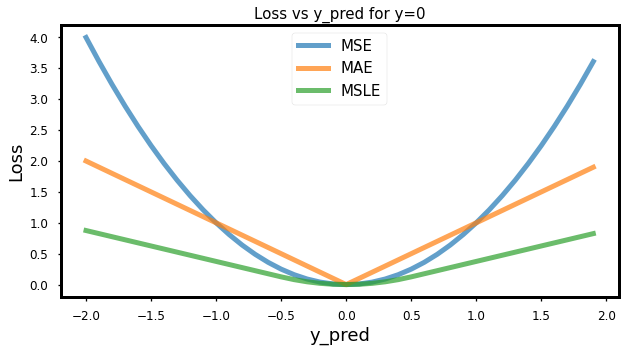

In [9]:
'''
We want to plot different loss functions.
We take y=0 and change y_pred over a range 
of values and see how the loss changes with
that. 
'''
y=0
y_pred_list = np.arange(-2,2,.1)

loss_dict = {
    'MSE':mse, 
    'MAE':mae,
    'MSLE': huber
}

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1 , xlabel = 'y_pred', ylabel='Loss', title = 'Loss vs y_pred for y=0')
for loss in list(loss_dict.keys()):
  ax.plot(y_pred_list, [loss_dict[loss](y, yp) for yp in y_pred_list], label=loss, alpha=.7)

plt.legend(loc=0)
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, max_error

'''
Sometimes loss refers to one single sample and 
the cost refers to the average over all the samples 
in the data. 
'''
def eval_loss(y,y_pred , loss=mean_absolute_error ):
  return loss([y],[y_pred])

eval_loss(0,4, mean_squared_log_error)

2.5902903939802346

In [11]:
mean_squared_error([0],[2])

4.0

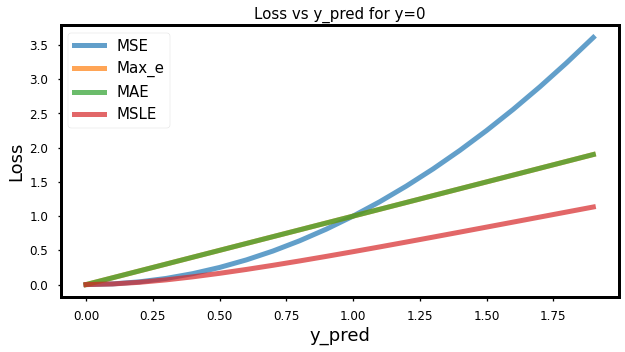

In [14]:
'''
We want to plot different loss functions.
We take y=0 and change y_pred over a range 
of values and see how the loss changes with
that. 
'''
y=0
y_pred_list = np.arange(0,2,.1)

loss_dict = {
    'MSE':mean_squared_error, 
    'Max_e': max_error, 
    'MAE':mean_absolute_error,
    'MSLE': mean_squared_log_error
}

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1 , xlabel = 'y_pred', ylabel='Loss', title = 'Loss vs y_pred for y=0')
for loss in list(loss_dict.keys()):
  ax.plot(y_pred_list, [eval_loss(y, yp, loss_dict[loss]) for yp in y_pred_list], label=loss, alpha=.7)

plt.legend(loc=0)
plt.show()

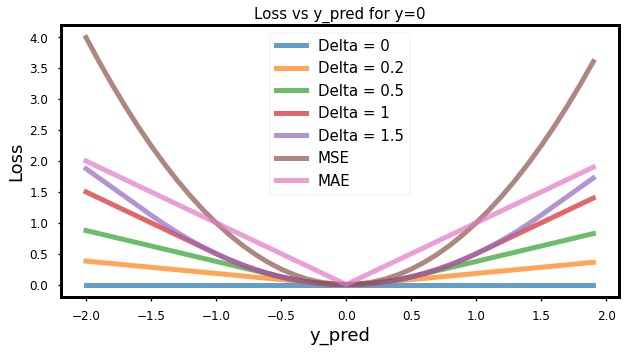

In [15]:
'''
We can take huber with different values of delta 
to take advantage of both MSE and MAE. 
We take y=0 and change y_pred over a range 
of values and see how the loss changes with
that. 
'''
y=0
y_pred_list = np.arange(-2,2,.1)

delta_list = [0,.2,.5,1,1.5]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1 , xlabel = 'y_pred', ylabel='Loss', title = 'Loss vs y_pred for y=0')
for delta in delta_list:
  ax.plot(y_pred_list, [huber(y, yp, delta) for yp in y_pred_list], label=f'Delta = {delta}', alpha=.7)

ax.plot(y_pred_list, [mse(y, yp) for yp in y_pred_list], label='MSE', alpha=.7)
ax.plot(y_pred_list, [mae(y, yp) for yp in y_pred_list], label='MAE', alpha=.7)
plt.legend(loc=0)
# plt.xlim(-.2,.2)
# plt.ylim(0,.3)
plt.show()

## Classification

In [17]:
'''
For classification, the assumption is that y is 0 or 1. 
We take y_pred to range between 0 and 1. 
'''

def hinge(y,y_pred):
  '''
  For hinge, y and y_pred should be scaled to -1 and 1. 
  '''
  y_sc = 2*y-1
  return np.max([0, 1-y_sc*y_pred])

def cross_entropy(y, y_pred):
  return -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)  


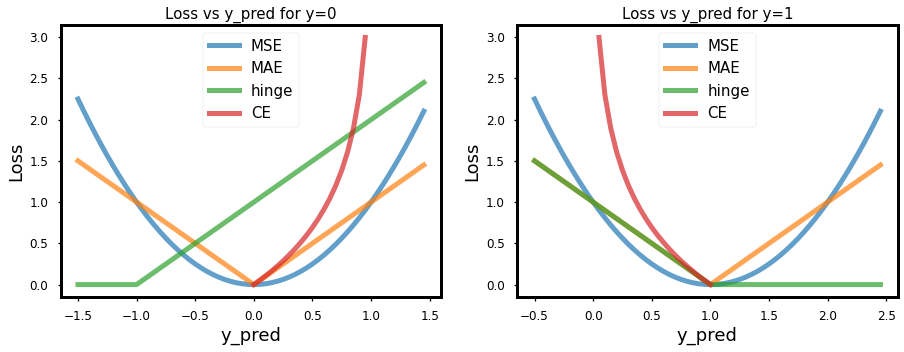

In [18]:
'''
We want to plot different loss functions.
We take y=0 and change y_pred over a range 
of values and see how the loss changes with
that. 
'''
loss_dict = {
    'MSE':mse, 
    'MAE':mae, 
    'hinge': hinge,
    'CE': cross_entropy
}

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1 , xlabel = 'y_pred', ylabel='Loss', title = 'Loss vs y_pred for y=0')
y=0
y_pred_list = np.arange(y-1.5,y+1.5,.05)
for loss in list(loss_dict.keys()):
  ax.plot(y_pred_list, [loss_dict[loss](y, yp ) for yp in y_pred_list], label=loss, alpha=.7)

plt.legend(loc=0)

ax = fig.add_subplot(1, 2, 2 , xlabel = 'y_pred', ylabel='Loss', title = 'Loss vs y_pred for y=1')
y=1
y_pred_list = np.arange(y-1.5,y+1.5,.05)
for loss in list(loss_dict.keys()):
  ax.plot(y_pred_list, [loss_dict[loss](y, yp ) for yp in y_pred_list], label=loss, alpha=.7)
# plt.xlim(0,1)
plt.legend(loc=0)
plt.show()

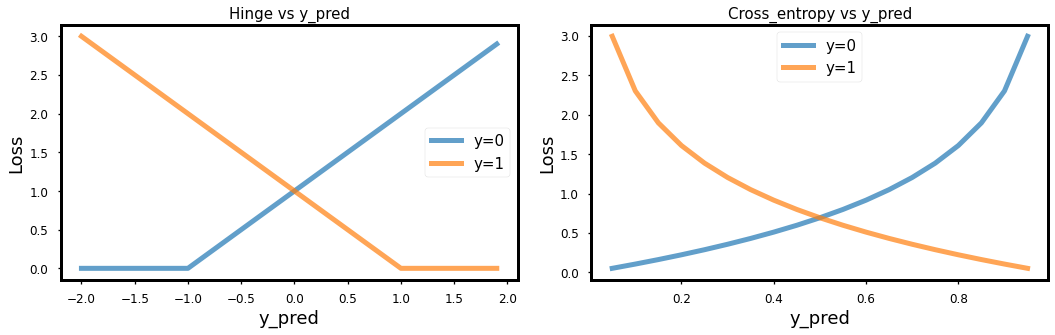

In [19]:
'''
Hinge
'''
y=0
y_pred_list = np.arange(-2,2,.1)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1 , xlabel = 'y_pred', ylabel='Loss', title = 'Hinge vs y_pred')
ax.plot(y_pred_list, [hinge(0, yp) for yp in y_pred_list], label='y=0', alpha=.7)
ax.plot(y_pred_list, [hinge(1, yp) for yp in y_pred_list], label='y=1', alpha=.7)
plt.legend(loc=0)
ax = fig.add_subplot(1, 2, 2 , xlabel = 'y_pred', ylabel='Loss', title = 'Cross_entropy vs y_pred')
y_pred_list = np.arange(0,1,.05)
ax.plot(y_pred_list, [cross_entropy(0, yp) for yp in y_pred_list], label='y=0', alpha=.7)
ax.plot(y_pred_list, [cross_entropy(1, yp) for yp in y_pred_list], label='y=1', alpha=.7)
plt.legend(loc=0)
plt.tight_layout()
plt.show()

# Linear Models training

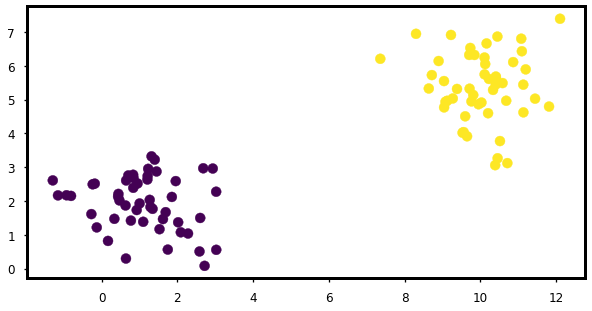

In [20]:
'''
Just as we did for clustering, we generate a set points in 2D but 
this time we are going to use the labels, Y for training a classifer. 
'''
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=100,centers=[[1,2], [10,5]])

plt.scatter(*X.T, c=Y)

In [21]:
'''
This function, takes the slope and fits a linear decision boundary. 
Then it use that to calculate the loss. 
It does so for all the values in w_list. 
'''
def loss_vs_w(w_list, b, x_list, y_list, loss=mean_squared_error):
  loss_list = []
  for w in w_list:
    y_pred = x_list@[1,w] + b
    loss_list +=[loss(y_list, y_pred)]
  return np.array(loss_list)

In [22]:
from sklearn.metrics import hinge_loss, log_loss

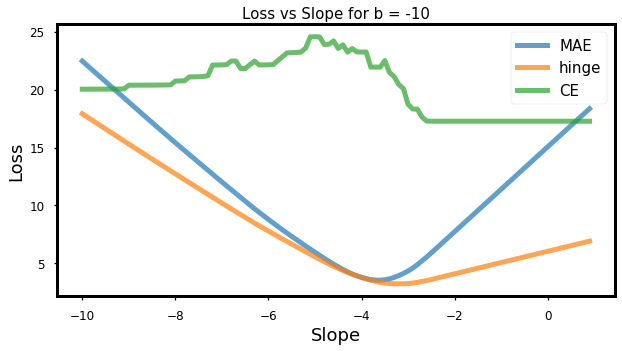

In [23]:
loss_dict = {
    # 'MSE':mean_squared_error, 
    'MAE':mean_absolute_error,
    'hinge':hinge_loss,
    'CE':log_loss
}
w_list = np.arange(-10,1,.1)
b = 10

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, xlabel='Slope', ylabel='Loss', title='Loss vs Slope for b = -10')
for loss in list(loss_dict.keys()):
  ax.plot(w_list, loss_vs_w(w_list, b, X, Y, loss_dict[loss]), label=loss, alpha=.7)

plt.legend(loc=0)
plt.show()


# Optimization

In [24]:
def simp_optimizer(X, Y, b=0, eta = .05, loss=mean_squared_error, n_itr=100):
  ## Start with a random value for w
  w = np.random.uniform(0,1)
  w_list = [w]

  ## Next we calculate the loss
  l = loss(Y, X@[1,w]+b  )

  ## We also need to keep track of the loss. 
  l_list = [l]
  
  ## We need to decide if we want to increas or decrease it. 
  dw = 1

  for i in range(n_itr):
    ## First we update the value of w. 
    w -= eta*dw
    w_list +=[w]
    l = loss(Y, X@[1,w]+b  )
    ## Check if l has decreased. 
    dw = (-1)**(l>l_list[-1])
    l_list += [l]

  return w, l_list, w_list




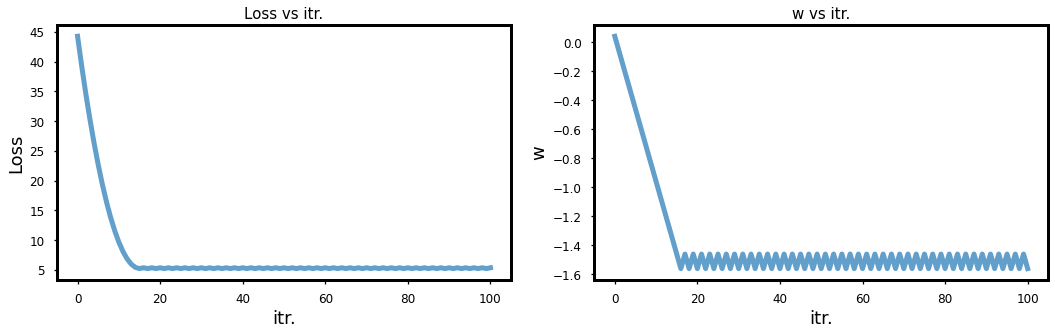

In [26]:
result = simp_optimizer(X, Y, eta=.1)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1 , xlabel = 'itr.', ylabel='Loss', title = 'Loss vs itr.')
ax.plot(result[1], label='MSE', alpha=.7)
# plt.legend(loc=0)

ax = fig.add_subplot(1, 2, 2 , xlabel = 'itr.', ylabel='w', title = 'w vs itr.')
y_pred_list = np.arange(0,1,.05)
ax.plot(result[-1], label='MSE', alpha=.7)
# plt.legend(loc=0)
plt.tight_layout()
plt.show()

In [27]:
%%time
result_dict = {
    'MSE':simp_optimizer(X, Y, eta=.1, loss=mean_squared_error), 
    'MAE':simp_optimizer(X, Y, eta=.1, loss=mean_absolute_error),
    'hinge':simp_optimizer(X, Y, eta=.1, loss=hinge_loss),
    'CE':simp_optimizer(X, Y, eta=.1, loss=log_loss)
}


CPU times: user 150 ms, sys: 0 ns, total: 150 ms
Wall time: 155 ms


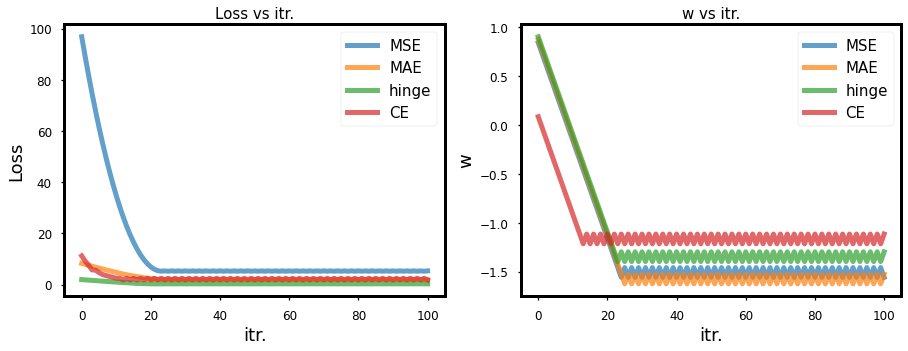

In [28]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1 , xlabel = 'itr.', ylabel='Loss', title = 'Loss vs itr.')
for loss in list(result_dict.keys()):
  ax.plot(result_dict[loss][1], label=loss, alpha=.7)
plt.legend(loc=0)

ax = fig.add_subplot(1, 2, 2 , xlabel = 'itr.', ylabel='w', title = 'w vs itr.')
for loss in list(result_dict.keys()):
  ax.plot(result_dict[loss][-1], label=loss, alpha=.7)
# plt.xlim(0,1)
plt.legend(loc=0)
plt.show()

## Non-linear functions

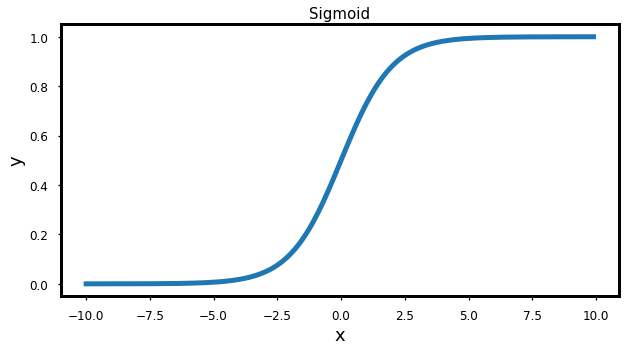

In [29]:
'''
Now, let's add a bit of non-linearity.
We do the same as before, but we add a 
sgimoid function
s(X1+wX2+b)
'''
def sig(x):
  return(1/(1+np.exp(-x)))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1 , xlabel = 'x', ylabel='y', title = 'Sigmoid')
plt.plot(np.arange(-10,10,.1), sig(np.arange(-10,10,.1)))  

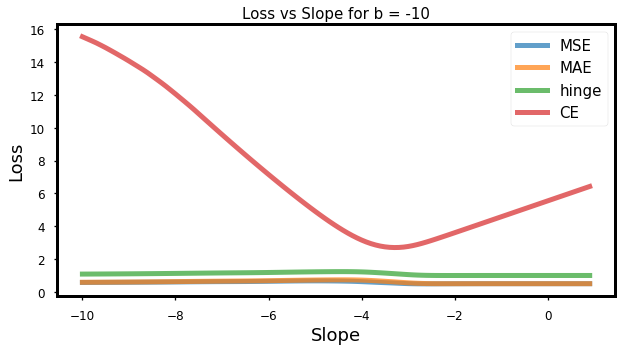

In [30]:
loss_dict = {
    'MSE':mean_squared_error, 
    'MAE':mean_absolute_error,
    'hinge':hinge_loss,
    'CE':log_loss
}
w_list = np.arange(-10,1,.1)
b = 10

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, xlabel='Slope', ylabel='Loss', title='Loss vs Slope for b = -10')
for loss in list(loss_dict.keys()):
  ax.plot(w_list, [loss_dict[loss](Y, sig(X@[1,w]+b) ) for w in w_list], label=loss, alpha=.7)

plt.legend(loc=0)
plt.show()


In [31]:
def simp_optimizer(X, Y, b=0, eta = .05, loss=mean_squared_error, n_itr=100):
  ## Start with a random value for w
  w = np.random.uniform(0,1)
  w_list = [w]

  ## Next we calculate the loss
  l = loss(Y, sig(X@[1,w]+b)  )

  ## We also need to keep track of the loss. 
  l_list = [l]
  
  ## We need to decide if we want to increas or decrease it. 
  dw = 1

  for i in range(n_itr):
    ## First we update the value of w. 
    w -= eta*dw
    w_list +=[w]
    l = loss(Y, sig(X@[1,w]+b)  )
    ## Check if l has decreased. 
    dw = (-1)**(l>l_list[-1])
    l_list += [l]

  return w, l_list, w_list




In [32]:
%%time
result_dict = {
    'MSE':simp_optimizer(X, Y, eta=.1, loss=mean_squared_error), 
    'MAE':simp_optimizer(X, Y, eta=.1, loss=mean_absolute_error),
    'hinge':simp_optimizer(X, Y, eta=.1, loss=hinge_loss),
    'CE':simp_optimizer(X, Y, eta=.1, loss=log_loss)
}


CPU times: user 169 ms, sys: 0 ns, total: 169 ms
Wall time: 180 ms


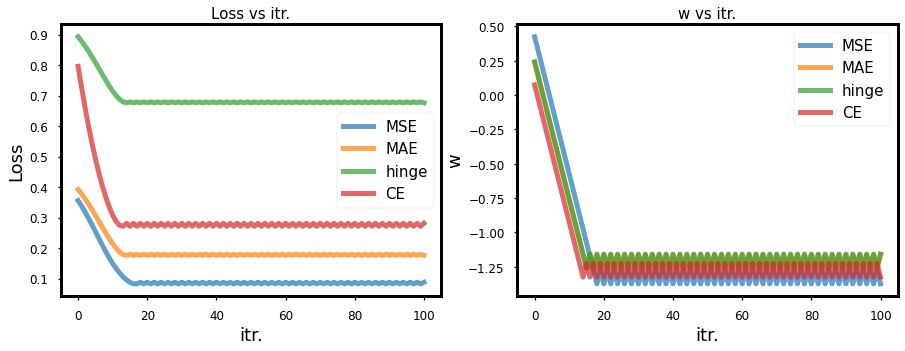

In [33]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1 , xlabel = 'itr.', ylabel='Loss', title = 'Loss vs itr.')
for loss in list(result_dict.keys()):
  ax.plot(result_dict[loss][1], label=loss, alpha=.7)
plt.legend(loc=0)

ax = fig.add_subplot(1, 2, 2 , xlabel = 'itr.', ylabel='w', title = 'w vs itr.')
for loss in list(result_dict.keys()):
  ax.plot(result_dict[loss][-1], label=loss, alpha=.7)
# plt.xlim(0,1)
plt.legend(loc=0)
plt.show()

In [34]:
for loss in list(result_dict.keys()):
  print(f'With {loss} loss function, the w is {result_dict[loss][0]:.02f}.\n')

With MSE loss function, the w is -1.37.

With MAE loss function, the w is -1.16.

With hinge loss function, the w is -1.16.

With CE loss function, the w is -1.33.



## Exercise

Repeat what we did for both w and b. 



1.   Calculate and plot (imshow) the loss function for w and b. Do this for all the loss functions we tried. 
2.   Design an optimizer that starting from a random set of w and b, converges to the optimal point. 
3.   Visualize Loss vs itr. 
4.   Visualize the path (in w and b space) that the optimizer took. Overlay this on top of the plot in 1. 

